In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing, model_selection as cross_validation, svm
from sklearn.metrics import mean_squared_error, r2_score


style.use('ggplot')

adv_df = pd.read_csv("Advertising.csv", index_col=0)
adv_df.head()


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


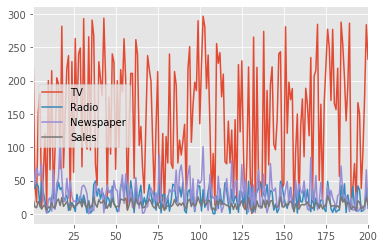

In [60]:
adv_df.plot()

In [96]:
#Case 1 with all features.
features = ['TV', 'Radio','Newspaper']
x = adv_df[features]
y = adv_df['Sales']
# Standardizing the features
x = StandardScaler().fit_transform(x)
#print(x)

#Use linear regression classifier 
X_train, X_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.2)
clf = LinearRegression()
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print('Confidence Linear Regression:', confidence)

# Gave 92%

Confidence Linear Regression: 0.9274070022857134


In [105]:
#Case 2 with PCA to 2 components.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

#print(principalDf.head())
xs = np.array(principalDf)

#Use linear regression classifier with PCA transformation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(xs, y, test_size=0.2)
clf = LinearRegression()
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print('Confidence Linear Regression:', confidence)

#Gave 88%

Confidence Linear Regression: 0.880622561018307


In [106]:
# Case 3 # PolynomialFeatures (prepreprocessing)
poly = PolynomialFeatures(degree=3)
X_train_ = poly.fit_transform(X_train)

lg = LinearRegression()
lg.fit(X_train_, y_train)

# Obtain coefficients
print(lg.coef_)
X_test_ = poly.fit_transform(X_test)
confidence = lg.score(X_test_, y_test)
print('Confidence Polynomial Regression degree 3:', confidence)

#Gave 89%

[ 0.          3.15039736 -2.5071441  -0.12429734 -0.71705237 -0.93006949
 -0.08113309  0.02621364  0.32422641 -0.44432258]
Confidence Polynomial Regression degree 3: 0.8985632961726993


In [95]:
# Case 4 # PolynomialFeatures (prepreprocessing)
poly = PolynomialFeatures(degree=2)
X_train_ = poly.fit_transform(X_train)

lg = LinearRegression()
lg.fit(X_train_, y_train)

# Obtain coefficients
print(lg.coef_)
X_test_ = poly.fit_transform(X_test)
confidence = lg.score(X_test_, y_test)
print('Confidence Polynomial Regression degree 2:', confidence)

#Gave 87%

[ 0.          2.86524589 -3.12641222 -0.15613771 -0.5316226  -0.84965091]
Confidence Polynomial Regression degree 2: 0.8785156774650226
